In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split

import random
import os
import torch.random
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_auc_score
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_cumulative_gain, plot_lift_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

In [15]:
def seed_everything(seed=7575):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.random.manual_seed(seed)

seed_everything()

In [2]:
train = pd.read_excel("Задача 1. Датасет 1. Тренировочный неразмеченный.xlsx", index_col='Параметр')
test = pd.read_excel("Задача 1. Датасет 1. Тренировочный размеченный.xlsx", index_col='Параметр')

In [4]:
pd_train = train.copy()
pd_test = test.copy()

pd_test['target'] = 1


In [31]:
data = pd.merge(left=pd_train, right=pd_test[['target']], left_on=pd_train.index, right_on=pd_test.index, how='left')
data.fillna(0, inplace=True)
data.set_index('key_0', inplace=True)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1),
                                                    data[['target']],
                                                    test_size=.3,
                                                    shuffle=False)

## Random Forest

In [105]:
model_g = RandomForestClassifier()
model_g.fit(X_train, y_train)

pred = model_g.predict(X_test)

pred_df = pd.DataFrame(data=pred, columns=['pred'], index=y_test.index)

y_score = model_g.predict_proba(X_test)

99.34
81.23
81.23
              precision    recall  f1-score   support

         0.0       0.96      0.62      0.76       184
         1.0       0.99      1.00      1.00     11018

    accuracy                           0.99     11202
   macro avg       0.98      0.81      0.88     11202
weighted avg       0.99      0.99      0.99     11202



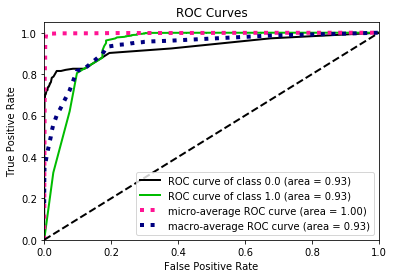

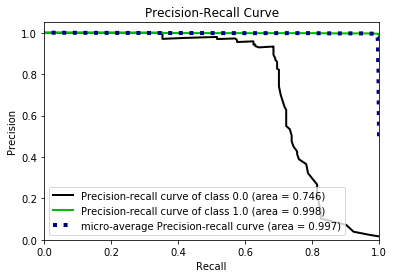

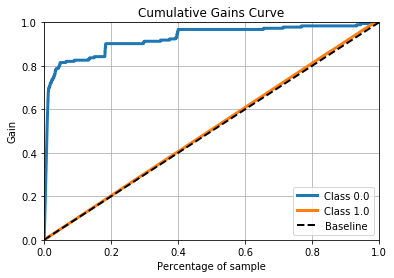

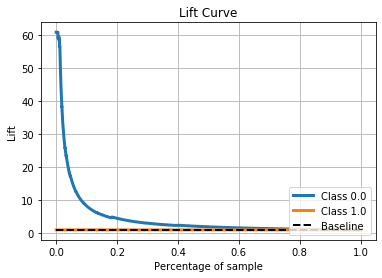

In [109]:
def print_res(y_test, y_pred, y_score=None):
    print(np.round(accuracy_score(y_test, y_pred)*100, 2))
    print(np.round(balanced_accuracy_score(y_test, y_pred)*100, 2))
    print(np.round(roc_auc_score(y_test, y_pred)*100, 2))
    print(classification_report(y_test, y_pred))


    # Графики
    if y_score is not None:
        plot_roc(y_test, y_score)
        plt.show()

        plot_precision_recall(y_test, y_score)
        plt.show()

        plot_cumulative_gain(y_test, y_score)
        plt.show()

        plot_lift_curve(y_test, y_score)
        plt.show()


print_res(y_test, pred_df, y_score)

### Log Reg

In [110]:
model_logreg = LogisticRegressionCV(cv=5, max_iter=1000, Cs=15)

model_logreg.fit(X_train, y_train)

pred = model_logreg.predict(X_test)

pred_df = pd.DataFrame(data=pred, columns=['pred'], index=y_test.index)

y_score = model_g.predict_proba(X_test)

98.87
66.56
66.56
              precision    recall  f1-score   support

         0.0       0.94      0.33      0.49       184
         1.0       0.99      1.00      0.99     11018

    accuracy                           0.99     11202
   macro avg       0.96      0.67      0.74     11202
weighted avg       0.99      0.99      0.99     11202



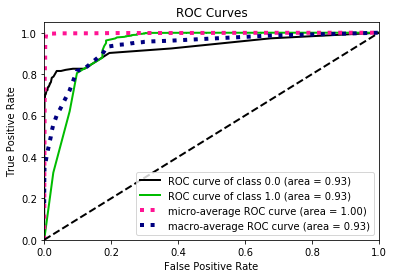

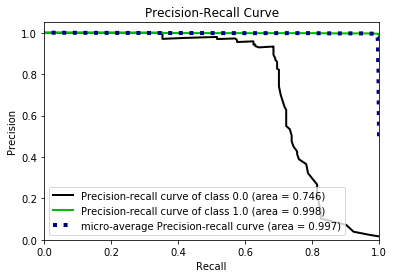

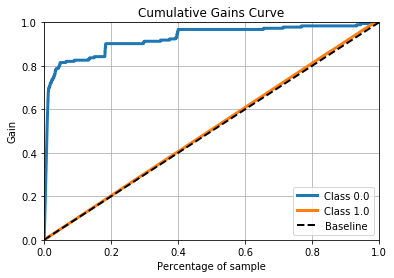

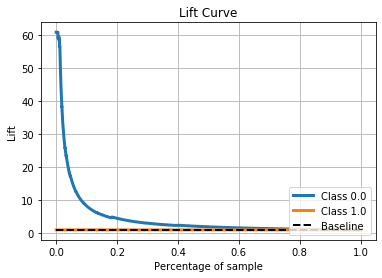

In [111]:
print_res(y_test, pred_df, y_score)

### Boosting

In [118]:
from catboost import CatBoostClassifier, Pool

In [123]:
train_pool = Pool(X_train, y_train)
eval_pool = Pool(X_test, y_test)

In [130]:
model_boost = CatBoostClassifier(verbose=0)

model_boost.fit(train_pool, eval_set=eval_pool)

In [131]:
pred = model_boost.predict(eval_pool)

pred_df = pd.DataFrame(data=pred, columns=['pred'], index=y_test.index)

y_score = model_boost.predict_proba(X_test)

98.38
52.69
52.69
              precision    recall  f1-score   support

         0.0       0.59      0.05      0.10       184
         1.0       0.98      1.00      0.99     11018

    accuracy                           0.98     11202
   macro avg       0.79      0.53      0.55     11202
weighted avg       0.98      0.98      0.98     11202



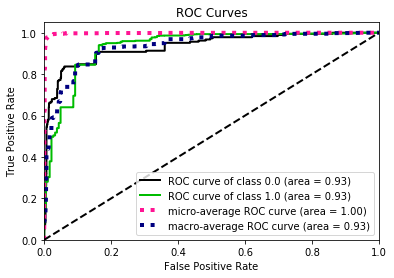

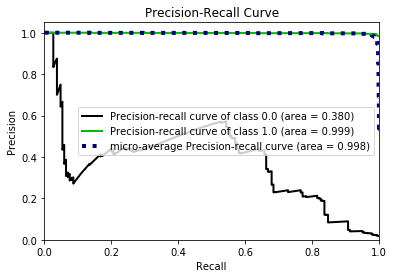

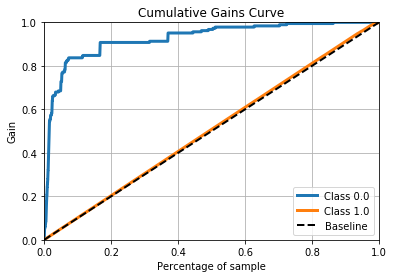

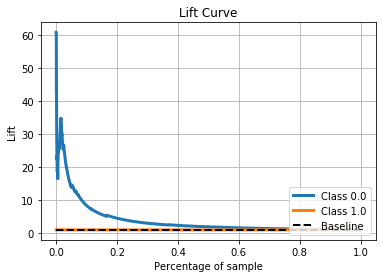

In [132]:
print_res(y_test, pred_df, y_score)